In [2]:
import pandas as pd
import numpy as np
import gensim

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
%matplotlib inline

# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')

In [7]:
scraped_data = pd.read_csv('./ndtv/NDTV Sentiments.csv')
scraped_data['time'] = pd.to_datetime(scraped_data['time'])
scraped_data = scraped_data[["title","content","retweet_count","favorite_count","Vader Sentiment","Vader_Analysis"]].dropna().reset_index(drop=True).copy()
print("Number of rows with any of the empty columns:\n",scraped_data.isnull().sum())
scraped_data.fillna(" ",inplace= True)
print("Dimensions:",scraped_data.shape)
scraped_data.head()

Number of rows with any of the empty columns:
 title              0
content            0
retweet_count      0
favorite_count     0
Vader Sentiment    0
Vader_Analysis     0
dtype: int64
Dimensions: (1371, 6)


,title,content,retweet_count,favorite_count,Vader Sentiment,Vader_Analysis
0,"Army Officer, 4 Personnel Killed In Encounter ...",an army officer and four other personnel were ...,9,63,-0.9829,Negative
1,"Aryan Khan Case: No Bail For Him Today, Next H...",aryan khan did not get bail today for the thir...,5,44,-0.7506,Negative
2,"Ex-National Conference Leaders Devender Rana, ...",a day after resigning from the national confer...,2,0,0.6597,Positive
3,"US Has Lost AI Battle To China, Pentagon's Ex-...",china has won the artificial intelligence batt...,5,0,-0.0516,Negative
4,International Day Of The Girl Child 2021: Lead...,various world leaders and un agencies posted w...,3,0,0.9403,Positive


In [8]:
word_tokenizer=RegexpTokenizer(r'\w+')
wordnet_lemmatizer = WordNetLemmatizer()
stopwords_nltk=set(stopwords.words('english'))

In [9]:
def tokenize_text(version_desc: str)-> list:
    words = word_tokenizer.tokenize(wordnet_lemmatizer.lemmatize(version_desc.lower()))
    tokens = {word for word, tag in nltk.pos_tag(words) if tag in 'NN'}
    tokens = tokens.difference(stopwords_nltk) # removing stop-words
    # tokens = {x for x in tokens if not str(x).startswith("#")} # removing hashtags
    tokens = [x for x in tokens if str(x).isalpha()] # removing non-alpha's 
    return tokens

document = scraped_data["content"][15]
print(document,"\n")
print(tokenize_text(document))

the farmers' agitation will continue till all demands are met, including repealing of the three farm laws and legal guarantee on minimum support price for crops, farmer leader rakesh tikait has said. talking to reporters in uttar pradesh's shamli district on sunday evening, he said that the centre is overlooking "the one-year long agitation of farmers in which 750 farmers have died". farmers have been protesting against the legislations at delhi border points since their enactment in september last year and demanding these be repealed. mr tikait claimed that farmers' income has not increased despite the price of goods.   the three farm laws and the bjp are "anti-farmer", he said, claiming that the government is not ready for a dialogue to resolve the issue. the bjp government at the centre only supports industrialists, he alleged. 

['shamli', 'enactment', 'rakesh', 'dialogue', 'tikait', 'farmer', 'income', 'support', 'farm', 'agitation', 'delhi', 'centre', 'border', 'issue', 'evening'

In [10]:
tokens = scraped_data["content"].apply(lambda x: tokenize_text(x))
tokens
# vec_words = CountVectorizer(tokenizer=tokenize_text,decode_error='ignore')
# total_features_words = vec_words.fit_transform(scraped_data["content"])
# total_features_words.shape

0       [hiding, gunfight, control, jammu, monday, gro...
1       [disguise, statement, khan, shah, control, rel...
2       [state, brother, staff, surjit, jitendra, rest...
3       [pentagon, opinion, state, resignation, pace, ...
4       [empowerment, access, december, role, theme, q...
                              ...                        
1366    [rocket, missile, town, japan, organization, k...
1367    [pentagon, agreement, kirby, staff, kabul, pas...
1368    [caen, le, agreement, staff, work, iran, thurs...
1369    [statement, agreement, staff, france, pact, in...
1370    [addition, goal, percent, covax, distancing, s...
Name: content, Length: 1371, dtype: object

# TF-IDF

In [11]:
from gensim.models import TfidfModel
from gensim.corpora import Dictionary

dct = Dictionary(tokens)
dct.filter_extremes(no_below=50)  # fit dictionary
print(dct)
# print(dct.token2id)


Dictionary(298 unique tokens: ['action', 'area', 'control', 'defence', 'district']...)


In [12]:
corpus = [dct.doc2bow(line) for line in tokens]  # convert corpus to BoW format
# model = TfidfModel(corpus)  # fit model
# vector = model[corpus[0]]

In [64]:
# def extract_features( document ):
#    terms = tuple(document.lower().split())
#    features = set()
#    for i in range(len(terms)):
#       for n in range(1,4):
#           if i+n <= len(terms):
#               features.add(terms[i:i+n])
#    return features

# def calculate_idf( documents ):
#    N = len(documents)
#    from collections import Counter
#    tD = Counter()
#    for d in documents:
#       features = extract_features(d)
#       for f in features:
#           tD[" ".join(f)] += 1
#    IDF = []
#    import math
#    for (term,term_frequency) in tD.items():
#        term_IDF = math.log(float(N) / term_frequency)
#        IDF.append(( term_IDF, term ))
#    IDF.sort(reverse=True)
#    return IDF

# # for (IDF, term) in calculate_idf(tokens.apply(lambda x: " ".join(x))):
# #     print(IDF, term)

[(3.3112726741341683, 'trade'),
 (3.3112726741341683, 'total'),
 (3.3112726741341683, 'plea'),
 (3.3112726741341683, 'manner'),
 (3.3112726741341683, 'half'),
 (3.3112726741341683, 'commissioner'),
 (3.3112726741341683, 'bank'),
 (3.2914700468379885, 'ms'),
 (3.2914700468379885, 'maurya'),
 (3.2914700468379885, 'lot'),
 (3.2914700468379885, 'biden'),
 (3.272051960980887, 'spokesman'),
 (3.272051960980887, 'problem'),
 (3.272051960980887, 'october'),
 (3.272051960980887, 'intelligence'),
 (3.272051960980887, 'hour'),
 (3.272051960980887, 'fact'),
 (3.272051960980887, 'emergency'),
 (3.272051960980887, 'deal'),
 (3.272051960980887, 'agreement'),
 (3.2530037660101927, 'washington'),
 (3.2530037660101927, 'seat'),
 (3.2530037660101927, 'responsibility'),
 (3.2530037660101927, 'recovery'),
 (3.2530037660101927, 'jail'),
 (3.2530037660101927, 'energy'),
 (3.2530037660101927, 'britain'),
 (3.2530037660101927, 'army'),
 (3.2530037660101927, 'account'),
 (3.23431163299804, 'progress'),
 (3.2343

In [73]:
# #Dcument Frequency
# N = scraped_data.shape[0]
# sorted([(round(N/np.exp(IDF)), term) for (IDF, term) in calculate_idf(tokens.apply(lambda x: " ".join(x))) if term in  set(dct.token2id.keys())], key= lambda x: x[0], reverse= True)


[(660, 'staff'),
 (641, 'story'),
 (640, 'feed'),
 (594, 'government'),
 (536, 'state'),
 (531, 'year'),
 (527, 'minister'),
 (504, 'headline'),
 (389, 'time'),
 (388, 'country'),
 (387, 'mr'),
 (356, 'police'),
 (349, 'today'),
 (339, 'case'),
 (336, 'india'),
 (334, 'day'),
 (329, 'union'),
 (289, 'party'),
 (275, 'world'),
 (272, 'leader'),
 (262, 'court'),
 (261, 'sunday'),
 (261, 'statement'),
 (260, 'congress'),
 (254, 'modi'),
 (249, 'home'),
 (247, 'week'),
 (246, 'president'),
 (234, 'son'),
 (232, 'place'),
 (231, 'singh'),
 (225, 'district'),
 (223, 'chief'),
 (221, 'monday'),
 (217, 'way'),
 (215, 'agency'),
 (214, 'group'),
 (212, 'friday'),
 (208, 'covid'),
 (205, 'incident'),
 (204, 'delhi'),
 (201, 'news'),
 (200, 'bjp'),
 (199, 'part'),
 (198, 'area'),
 (195, 'violence'),
 (190, 'family'),
 (184, 'number'),
 (184, 'month'),
 (174, 'security'),
 (174, 'power'),
 (173, 'order'),
 (173, 'gandhi'),
 (171, 'saturday'),
 (168, 'health'),
 (168, 'action'),
 (166, 'control'),


In [65]:
# Print Tf-IDF values for each doc

# for doc in model[corpus]:
#    print([[dct[id], np.around(freq,2)] for id, freq in doc])

tried bi-grams....
nothing of importance

In [13]:

# from gensim.utils import simple_preprocess, lemmatize
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s')
# logging.root.setLevel(level=logging.INFO)

In [126]:
from gensim.models import LdaMulticore

n_topics = 10
lda_model = LdaMulticore(corpus=corpus,
                         id2word=dct,
                         random_state=1,
                         num_topics=int(n_topics),
                         passes=15,
                         chunksize=500,
                         batch=False,
                         alpha='asymmetric',
                         decay=0.5,
                         offset=64,
                        #  eta=None,
                        #  eval_every=0,
                         iterations=500,
                        #  gamma_threshold=0.001,
                        #  per_word_topics=True
                         );

# save the model
lda_model.save('lda_model_ndtv.model');

# See the topics
lda_model.print_topics(-1)

[(0,
  '0.025*"minister" + 0.020*"state" + 0.019*"government" + 0.016*"mr" + 0.016*"union" + 0.016*"congress" + 0.016*"leader" + 0.015*"party" + 0.014*"police" + 0.014*"bjp"'),
 (1,
  '0.034*"staff" + 0.033*"story" + 0.033*"feed" + 0.026*"headline" + 0.016*"year" + 0.015*"government" + 0.014*"time" + 0.014*"state" + 0.013*"president" + 0.012*"world"'),
 (2,
  '0.029*"case" + 0.027*"police" + 0.024*"court" + 0.019*"year" + 0.018*"investigation" + 0.015*"agency" + 0.015*"mumbai" + 0.014*"control" + 0.013*"bureau" + 0.013*"officer"'),
 (3,
  '0.035*"demand" + 0.034*"supply" + 0.029*"punjab" + 0.028*"power" + 0.025*"delhi" + 0.024*"economy" + 0.023*"singh" + 0.023*"government" + 0.023*"minister" + 0.023*"sector"'),
 (4,
  '0.011*"president" + 0.011*"house" + 0.011*"news" + 0.011*"congress" + 0.011*"secretary" + 0.011*"report" + 0.011*"power" + 0.011*"press" + 0.011*"committee" + 0.010*"company"'),
 (5,
  '0.026*"minister" + 0.022*"government" + 0.020*"modi" + 0.019*"mr" + 0.017*"india" + 0

**Topic- 0:** International

**Topic- 1:** National

**Topic- 2:** Politics

**Topic- 3:** Law & Order

**Topic- 4:** Sports


In [127]:
topics_df = pd.DataFrame([], columns=["title","content","topic"]+[i for i in range(0,n_topics)], index = scraped_data.index)

topics_df[["title","content"]] = scraped_data[["title","content"]]

topics_df.head(2)

,title,content,topic,0,1,2,3,4,5,6,7,8,9
0,"Army Officer, 4 Personnel Killed In Encounter ...",an army officer and four other personnel were ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Aryan Khan Case: No Bail For Him Today, Next H...",aryan khan did not get bail today for the thir...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:

for index, bow in enumerate(corpus):
    topics = lda_model.get_document_topics(bow)
    for topic, probability in topics:
        topics_df[topic].iloc[index] = round(probability,2)
    topic_max = max(topics, key = lambda x: x[1])[0]
    topics_df["topic"].iloc[index] = topic_max
    # print(index)
    # print("Topic:",topic_max)
    # print(scraped_data["title"][index])
    # print()
topics_df = topics_df.fillna(0.0)
topics_df.head()


,title,content,topic,0,1,2,3,4,5,6,7,8,9
0,"Army Officer, 4 Personnel Killed In Encounter ...",an army officer and four other personnel were ...,2,0.01,0.01,0.73,0.0,0.0,0.0,0.0,0.0,0.0,0.22
1,"Aryan Khan Case: No Bail For Him Today, Next H...",aryan khan did not get bail today for the thir...,2,0.00,0.00,0.97,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,"Ex-National Conference Leaders Devender Rana, ...",a day after resigning from the national confer...,0,0.55,0.42,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,"US Has Lost AI Battle To China, Pentagon's Ex-...",china has won the artificial intelligence batt...,1,0.00,0.97,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,International Day Of The Girl Child 2021: Lead...,various world leaders and un agencies posted w...,1,0.00,0.96,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00


In [129]:
scraped_data["topic"] = topics_df["topic"]
scraped_data.head(2)

,title,content,retweet_count,favorite_count,Vader Sentiment,Vader_Analysis,topic
0,"Army Officer, 4 Personnel Killed In Encounter ...",an army officer and four other personnel were ...,9,63,-0.9829,Negative,2
1,"Aryan Khan Case: No Bail For Him Today, Next H...",aryan khan did not get bail today for the thir...,5,44,-0.7506,Negative,2


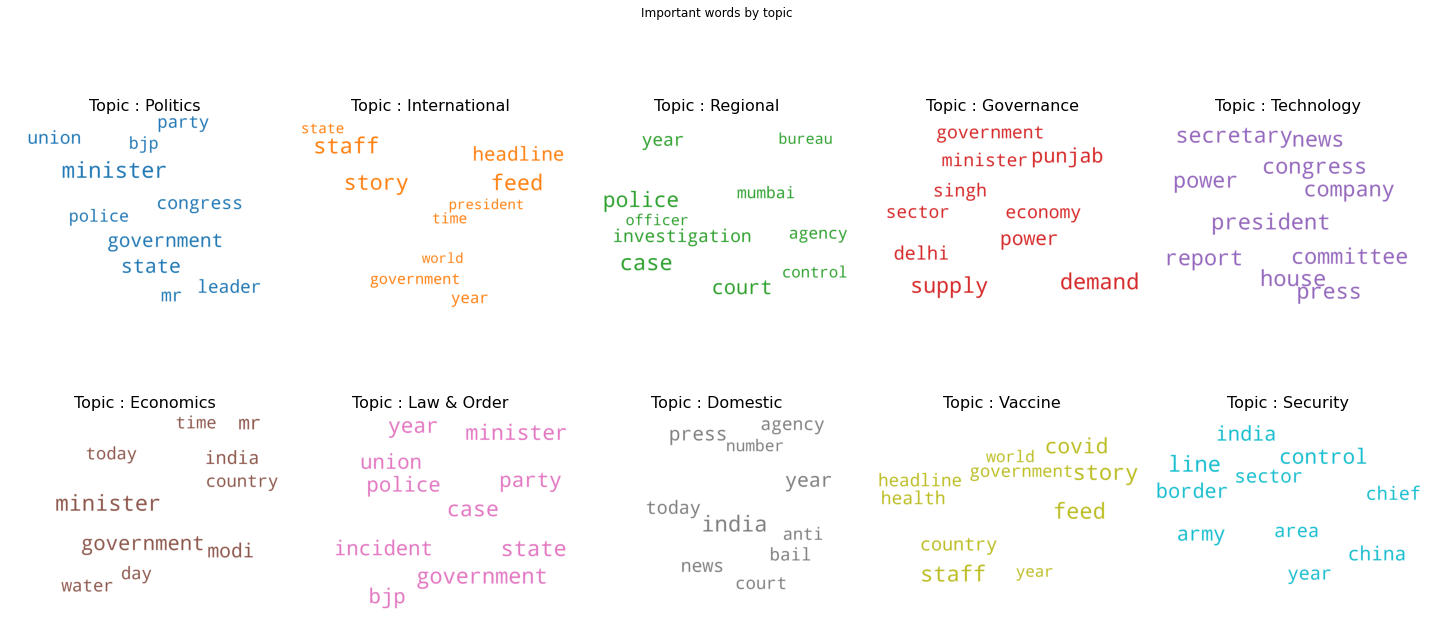

In [130]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
topic_moniker = ["Politics", "International", "Regional", "Governance", "Technology", "Economics", "Law & Order", "Domestic", "Vaccine", "Security"]

cloud = WordCloud(stopwords=stopwords_nltk,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 5, sharex=True, sharey=True)

fig.set_size_inches((20,10), forward= True)
plt.suptitle("Important words by topic", fontdict=dict(size=20))

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=200)
    plt.imshow(cloud)
    ax.set_title('Topic : ' + str(topic_moniker[i]), fontdict=dict(size=16))
    plt.axis('off')

plt.axis('off')
plt.tight_layout()

plt.show()


In [131]:
# Get topic weights and dominant topics ------------from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2, random_state=100, angle=0.9, init='pca');
tsne_lda = tsne_model.fit_transform(topics_df[[i for i in range(0,n_topics)]]);# Plot the Topic Clusters using Bokeh
output_notebook();

mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topics_df["topic"]]);
show(plot)



/Users/rchaks/opt/anaconda3/envs/barua_proj/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/rchaks/opt/anaconda3/envs/barua_proj/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Loading BokehJS ...

In [132]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word);
vis

/Users/rchaks/opt/anaconda3/envs/barua_proj/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/Users/rchaks/opt/anaconda3/envs/barua_proj/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/rchaks/opt/anaconda3/envs/barua_proj/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/rchaks/opt/anaconda3/envs/barua_proj/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.064484 -0.091540       1        1  32.231558
1     -0.066874  0.015478       2        1  26.745204
2      0.153225  0.019671       3        1  14.612909
8     -0.128382  0.019895       4        1  12.812568
5     -0.082537 -0.024544       5        1   7.183066
7      0.051941  0.080780       6        1   2.673328
3     -0.072730 -0.070447       7        1   1.661062
9      0.001840  0.133299       8        1   1.068257
6      0.066528 -0.075517       9        1   0.629553
4      0.012506 -0.007074      10        1   0.382496, topic_info=          Term        Freq       Total Category  logprob  loglift
44        year  529.000000  529.000000  Default  30.0000  30.0000
56    minister  507.000000  507.000000  Default  29.0000  29.0000
99       india  340.000000  340.000000  Default  28.0000  28.0000
75  government  577.000000  577.000000  Default  27.0000  27.0000
67       chief  220.000000  220.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
44        year    0.872495  529.145544  Topic10  -5.0764  -0.8415
95     country    0.713965  382.946062  Topic10  -5.2770  -0.7186
25      friday    0.631818  214.772728  Topic10  -5.3992  -0.2625
54    headline    0.703521  498.184857  Topic10  -5.2917  -0.9964
75  government    0.713073  577.647449  Topic10  -5.2782  -1.1309

[488 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
214       1  0.110366    account
214       2  0.386282    account
214       3  0.091972    account
214       4  0.367888    account
214       5  0.018394    account
...     ...       ...        ...
233       3  0.055614  yesterday
233       4  0.044491  yesterday
233       5  0.011123  yesterday
233       6  0.055614  yesterday
233       7  0.066737  yesterday

[1678 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 9, 6, 8, 4, 10, 7, 5])

In [133]:
t = topics_df[[i for i in range(0,n_topics)]]
t

,0,1,2,3,4,5,6,7,8,9
0,0.01,0.01,0.73,0.0,0.0,0.0,0.0,0.0,0.00,0.22
1,0.00,0.00,0.97,0.0,0.0,0.0,0.0,0.0,0.00,0.00
2,0.55,0.42,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00
3,0.00,0.97,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00
4,0.00,0.96,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
1366,0.00,0.97,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00
1367,0.00,0.97,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00
1368,0.01,0.95,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00
1369,0.01,0.19,0.00,0.0,0.0,0.0,0.0,0.0,0.77,0.00


In [134]:
import sklearn
pca = sklearn.decomposition.PCA(n_components = 3)
x = pd.DataFrame(pca.fit_transform(t), index=t.index, columns=[0,1,2])
x["topics"] = topics_df["topic"]
x[0:5]

,0,1,2,topics
0,-0.007251,0.425454,0.551877,2
1,-0.012896,0.530939,0.735171,2
2,0.118277,-0.371536,-0.029406,0
3,-0.659079,-0.388125,-0.049874,1
4,-0.652153,-0.382662,-0.049418,1


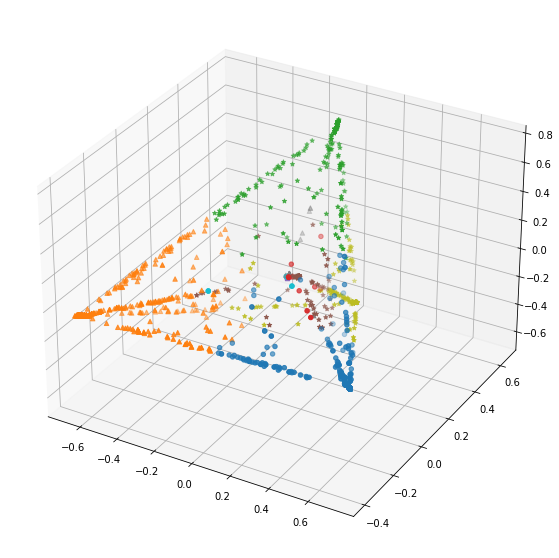

In [137]:
fig = plt.figure()
fig.set_size_inches((20,10))
ax = fig.add_subplot(projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
m = ['o','^','*']*4
for i in range(0,n_topics):
    b = x[topics_df['topic'] == i]
    ax.scatter(b[0], b[1], b[2], marker = m[i])
plt.show()

In [136]:
df = scraped_data.copy()
# df.Vader_Analysis = df.Vader_Analysis == "Positive"
df["topic"] = df["topic"].apply(lambda x: (topic_moniker[x]))
df


 0
Ex-National Conference Leaders Devender Rana, Surjit Slathia Join BJP
Agitation Will Continue Till Demands Are Met: Farmer Leader
PM Pays Tribute To Jayaprakash Narayan On His 119th Birth Anniversary
Terrorist Who Killed Kashmir Cab Driver Gunned Down By Security Forces: Police
Maharashtra Bandh Live Updates: Bus Services Affected, Local Trains Running
Your Leaves Cancelled, UP Police To Staff Amid Farmers' Protest
Maharashtra Bandh Live Updates: Bus Services Affected, Local Trains Running
"Doesn't Mean You Mow Down Anyone With Fortuner": UP BJP Chief's Swipe
Why Isn't Centre Removing Minister Over Farmers Killing: Asaduddin Owaisi
A Day May Come When Government Will Be Sold To A Company, Run Through Outsourcing: Akhilesh Yadav

 1
US Has Lost AI Battle To China, Pentagon's Ex-Software Chief Says: Report
International Day Of The Girl Child 2021: Leaders Post Inspirational Messages
India Never Had More Decisive Government: PM Modi At Space Association Launch
India Never Had More Dec

Sentiment by topic

In [139]:
df = scraped_data.copy()
topic_moniker = ["Politics", "International", "Regional", "Governance", "Technology", "Economics", "Law & Order", "Domestic", "Vaccine", "Security"]
df["topic"] = df["topic"].apply(lambda x: (topic_moniker[x]))
df

,title,content,retweet_count,favorite_count,Vader Sentiment,Vader_Analysis,topic
0,"Army Officer, 4 Personnel Killed In Encounter ...",an army officer and four other personnel were ...,9,63,-0.9829,Negative,Regional
1,"Aryan Khan Case: No Bail For Him Today, Next H...",aryan khan did not get bail today for the thir...,5,44,-0.7506,Negative,Regional
2,"Ex-National Conference Leaders Devender Rana, ...",a day after resigning from the national confer...,2,0,0.6597,Positive,Politics
3,"US Has Lost AI Battle To China, Pentagon's Ex-...",china has won the artificial intelligence batt...,5,0,-0.0516,Negative,International
4,International Day Of The Girl Child 2021: Lead...,various world leaders and un agencies posted w...,3,0,0.9403,Positive,International
...,...,...,...,...,...,...,...
1366,"On North Korea, Joe Biden's ""No Urgency"" Polic...","during their only meeting, barack obama warned...",2,0,-0.3400,Negative,International
1367,"""Been Very Honest About Concerns With Pak"" Ove...",the us has been very honest about its concerns...,4,0,0.4404,Positive,International
1368,"Iran To Set Date In ""Weeks"" To Return To Nucle...",iran's new government will in the next few wee...,3,0,0.7845,Positive,International
1369,"European Union, Australia Trade Talks Postpone...",a long-planned round of australia-eu free trad...,3,0,0.8442,Positive,Vaccine


In [144]:
print("Sentiment Analysis, NDTV")
sentiment_topic = df.groupby(["topic","Vader_Analysis"])["Vader Sentiment"].agg(["count"]).unstack().fillna(0)
sentiment_topic.to_csv("NDTV_Sentiment.csv")
sentiment_topic

Sentiment Analysis, NDTV


count         
Vader_Analysis Negative Positive
topic                           
Domestic           11.0     17.0
Economics          37.0     65.0
Governance         12.0      3.0
International     213.0    213.0
Law & Order         3.0      0.0
Politics          224.0    135.0
Regional          152.0     68.0
Security            5.0      7.0
Technology          0.0      1.0
Vaccine           102.0    103.0

In [146]:
print("Engagement Analysis, NDTV")
engagement_topic = df.groupby(["topic","Vader_Analysis"])["retweet_count","favorite_count"].agg(["mean"]).unstack().fillna(0)
engagement_topic = engagement_topic/16.1
engagement_topic.to_csv("NDTV_Engagement.csv")
engagement_topic

Engagement Analysis, NDTV


/var/folders/y3/v6fyb_rs72bcn7ftc3lvwvmw0000gn/T/ipykernel_28628/2070276483.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  engagement_topic = df.groupby(["topic","Vader_Analysis"])["retweet_count","favorite_count"].agg(["mean"]).unstack().fillna(0)


retweet_count           favorite_count           
                        mean                     mean           
Vader_Analysis      Negative  Positive       Negative   Positive
topic                                                           
Domestic            1.530209  1.863354       8.294749  11.603946
Economics           0.508645  0.430005       2.269599   1.482083
Governance          0.543478  1.138716       1.656315   4.575569
International       0.437699  0.398624       1.203161   1.654857
Law & Order         2.877847  0.000000      22.422360   0.000000
Politics            3.129714  1.034737      14.976431   4.628479
Regional            0.927182  1.407563       2.902501   8.033431
Security            0.434783  1.073647       2.173913   4.108252
Technology          0.000000  0.434783       0.000000   0.000000
Vaccine             0.380587  0.543328       1.370113   1.872399

In [148]:
analysis = df.groupby(["topic","Vader_Analysis"]).agg({
                                "Vader Sentiment":"count",
                                "retweet_count":"mean",
                                "favorite_count":"mean"
                              }).fillna(0)
analysis[["retweet_count","favorite_count"]] = analysis[["retweet_count","favorite_count"]]/2.5
# analysis.to_csv("ndtv_analysis_overall.csv")
analysis

Vader Sentiment  retweet_count  favorite_count
topic         Vader_Analysis                                                
Domestic      Negative                     11       9.854545       53.418182
              Positive                     17      12.000000       74.729412
Economics     Negative                     37       3.275676       14.616216
              Positive                     65       2.769231        9.544615
Governance    Negative                     12       3.500000       10.666667
              Positive                      3       7.333333       29.466667
International Negative                    213       2.818779        7.748357
              Positive                    213       2.567136       10.657277
Law & Order   Negative                      3      18.533333      144.400000
Politics      Negative                    224      20.155357       96.448214
              Positive                    135       6.663704       29.807407
Regional      Negative                    152       5.971053       18.692105
              Positive                     68       9.064706       51.735294
Security      Negative                      5       2.800000       14.000000
              Positive                      7       6.914286       26.457143
Technology    Positive                      1       2.800000        0.000000
Vaccine       Negative                    102       2.450980        8.823529
              Positive                    103       3.499029       12.058252